In [1]:
# In this notebook we will get familiar with cross-validation, linear 
# regression, and gradient descent optimization

# We will continue working with the tinysol dataset

# install mirdata on the colab shell
### your code here

# now import mirdata
### your code here

     |████████████████████████████████| 13.1 MB 6.2 MB/s 
     |████████████████████████████████| 5.6 MB 6.8 MB/s 
     |████████████████████████████████| 51 kB 63 kB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 90 kB 2.0 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=28320ce7767b1bab48c7df4e94a87a2bd5825803a78b96c1e07c47eb8564a3a2
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64922 sha256=e61926e53daa2b7dc2e1898e02f016da7571f94448745cc6b7d5bb25a8d3b543
  Stored in directory: /root/.cache/pip/wheels/c9/aa/16/ce72bc4caa58dfab819e3f46b3542f2bf90a83009f4ea07a48
  Created wheel for mir-eval: filename=mir_eval-0.7-py3-none-any.whl size=100721 sha256=b3d1729b229cdb0ea3bfd27b90fab8d31e799e0ebb304b7a75bd0c8e791a4270
  Stored in directory: /root/.cache/pip/whe

In [4]:
# now we can initialize the tinysol dataset and (down)load it
tinysol = ### your code here
tinysol### your code here

INFO: Downloading ['audio', 'annotations'] to /root/mir_datasets/tinysol
INFO: [audio] downloading TinySOL.tar.gz
INFO: /root/mir_datasets/tinysol/audio/TinySOL.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: [annotations] downloading TinySOL_metadata.csv
312kB [00:02, 109kB/s]                           



The shape of 'data' is  (309, 2) 



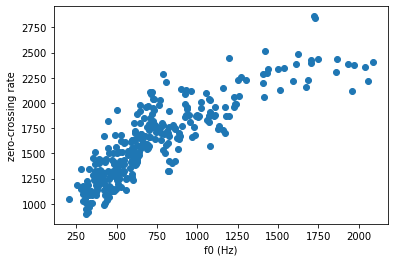

In [5]:
# let's load a few libraries that we will need
import librosa
import numpy as np
import matplotlib.pyplot as plt

###############################################################
# To make algorithm optimization easy, we will work with two  #
# features (i.e. two dimensions) so that we are               #
# able to visualize linear regression and its optimization    #
#                                                             #
# we will extract a couple features from ALL datapoints       #
# that we want to work with                                   #
###############################################################

# get all the track_ids
all_tracks = ### your code here

# the datapoints that we want to work with are ALL the Viola tones

# create a "data" matrix, where rows correspond to each viola datapoint
# "data" has two columns, the first one with the f0 and the second one
# with the spectral centroid. Use librosa to extract these features
# from each Viola track in the tinysol dataset. To extract the f0 (fundamental
# frequency), use librosa.yin (make sure you use all the correct arguments
# for this function; use of the correct arguments is VERY IMPORTANT).

data = []
for t in all_tracks:  
  if tinysol.track(t).instrument_abbr == 'Va':        
    x,sr = ### your code here to load the audio and sr
    # feature 1. f0
    f0 = ### your code here
    # feature 2. spectral centroid
    sc = ### your code here
    
    # concatenate the two features from each datapoint
    data.append([f0,sc])

data = np.array(data)

print("\nThe shape of 'data' is ", data.shape,"\n")

# we can also visualize these features
plt.scatter(data[:,0],data[:,1])
plt.xlabel('f0 (Hz)')
plt.ylabel('spectral centroid')
plt.show()

In [16]:
# now randomly select ~5% of the data and set it apart as test set
# Hint: you can use the np.random.choice function (with replace=False) 
# and use the first ~5% of its output to index out the test set

all_idx = ### your code here

data_ts = data[all_idx[### your code here
data_tr = data[all_idx[### your code here

print("The shape of the training data is ", data_tr.shape)
print("The shape of the testing data is ", data_ts.shape)

The shape of the training data is  (294, 2)
The shape of the testing data is  (15, 2)


In [8]:
# some libraries we will use
import time
! pip install sklearn
from sklearn.model_selection import KFold
from IPython import display


# now let's standardize our training features to be zero-mean and unit variance
mu_tr = ### your code here
std_tr = ### your code here
data_tr = ### your code here

for fold No. 1 , the optimized parameters were 0  w= [0.86267586] and b= [0.01141236]
for fold No. 2 , the optimized parameters were 1  w= [0.86217097] and b= [0.00914778]
for fold No. 3 , the optimized parameters were 2  w= [0.83593209] and b= [-0.01223353]
for fold No. 4 , the optimized parameters were 3  w= [0.83470536] and b= [-0.00186227]
for fold No. 5 , the optimized parameters were 4  w= [0.88435991] and b= [-0.00457069]


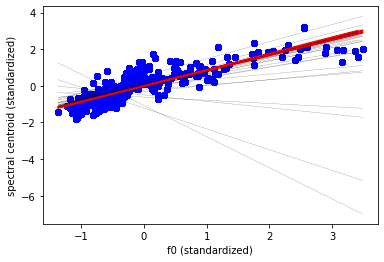

In [11]:
# Here's the main body of this homework

# we will use k-fold cross validation to optimize a simple linear regression
# model using gradient descent. 

# let's start by defining our independent (x) and dependent (y) variables
# Q: which one of the two features (f0 or spectral centroid) should be the
# independent variable? Why?
# A: 
x = ### your code here
y = ### your code here

# Now define the learning variables for the optimization algorithm
epochs = ### your code here to define the number of epochs
lr = ### your code here to define the learning rate

# we are ready to start the optimization routine
# using sklearn.Kfold, we will split the data into 5 folds
# and we will use each fold as validation set in a for loop
n_splits = 5
kf = KFold(n_splits=n_splits)
# we will also save the slope and bias terms that we find
# for each fold in a list
ws = []
bs = []
all_Jtrs = []
all_Jvls = []
for ifold, (tr_idx, vl_idx) in enumerate(kf.split(x)):

  print("\n#######################")
  print("# training fold No. {} #".format(ifold+1))
  print("#######################\n")
  time.sleep(3)

  # organize the data into training and validation splits
  x_tr, x_vl = x[tr_idx], x[vl_idx]
  y_tr, y_vl = y[tr_idx], y[vl_idx]

  # intialize the slope and bias as
  # random numbers drawn from a normal
  # distribution (use np.random.randn)
  w = ### your code here
  b = ### your code here

  # we will repeatedly show the data 
  # to out gradient descent
  # algorithm a few times 
  Jtrs = []
  Jvls = []
  for e in range(epochs):
    
    # compute y_hat with the training data
    y_hat_tr = ### your code here
    # compute y_hat with the validation data
    y_hat_vl = ### your code here

    # compute the loss function with the training data
    J_tr = ### your code here
    # compute the loss function with the validation data
    J_vl = ### your code here

    # save the training and validation loss to visualize at the end
    Jtrs.append(J_tr)
    Jvls.append(J_vl)

    print("at epoch {} the training loss J_tr = {:.5f}".format(e+1,J_tr))
    print("          and validation loss J_vl = {:.5f}".format(J_vl))
    print("    w = ", w)
    print("    b = ", b)
    
    
    # now let's plot to see our learning progress every epoch
    time.sleep(1.5)
    plt.scatter(x_tr,y_tr,c='blue')
    plt.xlabel('f0 (standardized)')
    plt.ylabel('spectral centroid (standardized)')
    plt.plot([np.min(x_tr),np.max(x_tr)], [np.min(x_tr)*w+b,np.max(x_tr)*w+b],c='red') if e== 19 else plt.plot([np.min(x_tr),np.max(x_tr)], [np.min(x_tr)*w+b,np.max(x_tr)*w+b],c='black',linestyle='dashed',linewidth=0.2)    
    display.clear_output(wait=True)
    display.display(plt.gcf())        

    # now compute the gradient of w and b
    dw = ### your code here
    db = ### your code here

    # and update w and b
    w = w - lr*dw
    b = b - lr*db
  
  display.clear_output()

  # let's save the fold's optimized parameters and each epoch tr and vl loss
  ws.append(w)
  bs.append(b)
  all_Jtrs.append(Jtrs)
  all_Jvls.append(Jvls)

for i in range(n_splits):
  print("for fold No.",i+1, ", the optimized parameters were", i, " w=", ws[i], "and b=",bs[i])


Plotting the training and validation losses:



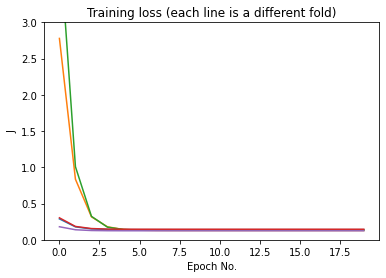

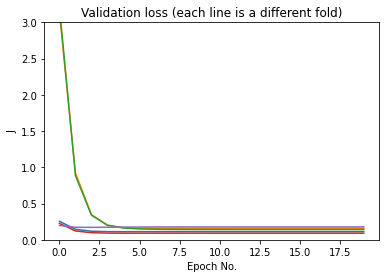

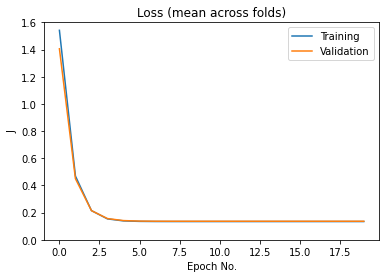

In [12]:
# this cell works without needing to change or add code

print("\nPlotting the training and validation losses:\n")

plt.plot(np.array(all_Jtrs).T)
plt.title('Training loss (each line is a different fold)')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,3])
plt.show()
plt.plot(np.array(all_Jvls).T)
plt.title('Validation loss (each line is a different fold)')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,3])
plt.show()
plt.title('Loss (mean across folds)')
plt.plot(np.mean(np.array(all_Jtrs),axis=0),label='Training')
plt.plot(np.mean(np.array(all_Jvls),axis=0),label='Validation')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,1.6])
plt.legend()
plt.show()

# Q: how do the losses differ between folds? why do you think this is seen?
# A:

# Q: how do the losses differ between training and validation splits? why do you think this is seen?
# A:

# Q: is your model overfit, underfit, or properly optimized? how do you know this?
# A:

In [13]:
####################
# model evaluation #
####################

# now you have a list of 'w' and a list of 'b' parameters
# Q: why do we have many 'w' and many 'b', if we only need one of each for our model?
# A:

# to evaluate the model, we only need one, not five. 
# Q: how would you go about getting a single 'w' and a single 'b'?
# A:

best_w = ### your code here
best_b = ### your code here

# Now, using your optimized 'w' and 'b' calculate the absolute error between y_hat and y with ALL your training
training_error = ### your code here
print("The standardized training error was: ", training_error)

# Q: why do we say that this is the "standardized training" error?
# A:

# Q: should we consider calculating the non-standardized training error? why?
# A: 

# if you are happy with your model optimization, you may move on to the next cell. 

##################################################################################
# ATTENTION: DO NOT move to the next cell until you have a well-optimized model. #
# continuing without a well-optimized model will ruin the model evaluation.      #
##################################################################################

The standardized training error was:  0.4041376117606221


The standardized testing error was:  0.35106055081336063


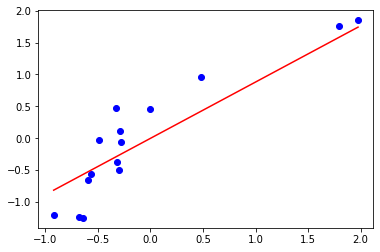

In [17]:
##################################################################
# RUN THIS CELL ONLY ONCE WHEN YOU ARE DONE WITH THE CELLS ABOVE #
# Running this cell more than once is a violation of             #
# international Machine Learning Law                             #
##################################################################
# Q: why is it so important that you run this cell only once at the
# very end?
# A:


# now do the same evaluation with the test set

# IMPORTANT: you will have to standardize the test data using the training data mu and std
# Q: why do we standardize the test data with the training mu and std?
# A:

data_ts = ### your code here

x_ts = ### your code here
y_ts = ### your code here

test_set_error = ### your code here
print("The standardized testing error was: ", test_set_error)
plt.scatter(x_ts,y_ts,c='blue')
plt.plot([np.min(x_ts),np.max(x_ts)], [np.min(x_ts)*best_w+best_b,np.max(x_ts)*best_w+best_b],c='red')
plt.xlabel('f0 (standardized)')
plt.ylabel('spectral centroid (standardized)')
plt.title('Regression model on the test set')    
plt.show()

In [ ]:
# Now your homework truly starts: (just kidding, you are almost done this time and there is no more "coding")

# Q: were your optimized 'w' and 'b' parameters good for the test set data? how do you know if they were or not?
# A: 

# Q: which was lower, the training or the test error? Why?
# A: 

# Q: Would the same 'w' and 'b' parameters work with another musical instrument?
# A: 

# Q: Would the same 'w' and 'b' parameters work with a new recording of Viola tones?
# A: 

# Q: 
# Picture this scenario: your friend has arranged Morton Feldman's "the viola
# in my life" to be played with solo viola. She wants to create a visualization 
# of the viola spectral centroid (she will map the spectral centroid values to 
# a heatmap of colors that is projected on a screen behind her, but the exact details
# are a secret to surprise the public and she does not want to tell you more about it) 
#
# She has a problem though, and you must help her:
#
# from the score that she will follow, she can only get f0 for each tone, and she also needs the spectral centroid. 
#
# What would you have to do to use your linear regression model for 
# her live performance, predicting the spectral centroid from the f0 data in the score?
# 
# Be as detailed as possible explaining the steps to do f0 data pre-processing
# and prediction usng your model on "unseen, real-world data"
#
# A:
#
#
#
#
# Q: which short-comings do you anticipate your model will face when being
# applied on this real-world data? Is your model good enough to do this in the first place?
# how do you know?
# A:
#
#
# Remember: to successfully help her, she will give you f0 values, and you
# must give her the corresponding spectral-centroid values, all of this BEFORE
# the live performance. In other words, you do NOT have access to audio data AT ALL.
# You only have the score and the f0 values.